In [1]:
import pandas as pd
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scikitplot as skplt
from sklearn import metrics
from graphviz import Digraph
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,\
matthews_corrcoef,classification_report,roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
plt.style.use('ggplot')
os.chdir('C:/Users/neeraj/Desktop/drivendata/predicting disease spread')

In [19]:
train_dataset= pd.read_csv('dengue_features_train.csv')
label_dataset=pd.read_csv('dengue_labels_train.csv')
test_dataset=pd.read_csv('dengue_features_test.csv')
display(train_dataset.head(10))

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8
5,sj,1990,23,1990-06-04,NaN,0.174850,0.254314,0.181743,9.58,299.630000,...,26.49,79.891429,9.58,17.212857,2.100000,28.114286,6.942857,34.4,23.9,39.1
6,sj,1990,24,1990-06-11,0.112900,0.092800,0.205071,0.210271,3.48,299.207143,...,38.60,82.000000,3.48,17.234286,2.042857,27.414286,6.771429,32.2,23.3,29.7
7,sj,1990,25,1990-06-18,0.072500,0.072500,0.151471,0.133029,151.12,299.591429,...,30.00,83.375714,151.12,17.977143,1.571429,28.371429,7.685714,33.9,22.8,21.1
8,sj,1990,26,1990-06-25,0.102450,0.146175,0.125571,0.123600,19.32,299.578571,...,37.51,82.768571,19.32,17.790000,1.885714,28.328571,7.385714,33.9,22.8,21.1
9,sj,1990,27,1990-07-02,NaN,0.121550,0.160683,0.202567,14.41,300.154286,...,28.40,81.281429,14.41,18.071429,2.014286,28.328571,6.514286,33.9,24.4,1.1


In [3]:
#converting dtypes of columns and merging labels 
train_dataset['year']=pd.to_datetime(train_dataset['year'])
#Breaking the dataset(city wise)
train_sj=train_dataset[train_dataset['city']=='sj']
train_iq=train_dataset[train_dataset['city']=='iq'].reset_index().drop(['index'],axis=1)
label_sj=label_dataset[label_dataset['city']=='sj']
label_iq= label_dataset[label_dataset['city']=='iq'].reset_index().drop(['index'],axis=1)
test_sj=test_dataset[test_dataset['city']=='sj']
test_iq=test_dataset[test_dataset['city']=='iq'].reset_index().drop(['index'],axis=1)
label_sj.drop(['city','year','weekofyear'],axis=1,inplace=True) 
label_iq.drop(['city','year','weekofyear'],axis=1,inplace=True)
train_sj.drop(['city', 'year', 'week_start_date'],axis=1,inplace=True)
train_iq.drop(['city', 'year', 'week_start_date'],axis=1,inplace=True)
test_iq.drop(['city', 'year', 'week_start_date'],axis=1,inplace=True)
test_sj.drop(['city', 'year', 'week_start_date'],axis=1,inplace=True)


C:\Users\neeraj\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [4]:
#filling missing values with mean
train_sj=train_sj.apply(lambda x: x.fillna(x.mean()),axis=0)
train_iq=train_iq.apply(lambda x: x.fillna(x.mean()),axis=0)
test_sj=test_sj.apply(lambda x: x.fillna(x.mean()),axis=0)
test_iq=test_iq.apply(lambda x: x.fillna(x.mean()),axis=0)

In [5]:
#for city sj 
#checking for null values
display(train_sj.isnull().sum())
#checking the daatypes of the columns
print('#########################################################################')
display('data types of the column features are:'.format(train_sj.info()))
#shape of the dataset
print("#########################################################################")
display("Dimention of the training dataset is:{}".format(train_sj.shape))
print("#########################################################################")
display(train_dataset.describe())

weekofyear                               0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_precip_mm                        0
dtype: int64

#########################################################################
<class 'pandas.core.frame.DataFrame'>
Int64Index: 936 entries, 0 to 935
Data columns (total 21 columns):
weekofyear                               936 non-null int64
ndvi_ne                                  936 non-null float64
ndvi_nw                                  936 non-null float64
ndvi_se                                  936 non-null float64
ndvi_sw                                  936 non-null float64
precipitation_amt_mm                     936 non-null float64
reanalysis_air_temp_k                    936 non-null float64
reanalysis_avg_temp_k                    936 non-null float64
reanalysis_dew_point_temp_k              936 non-null float64
reanalysis_max_air_temp_k                936 non-null float64
reanalysis_min_air_temp_k                936 non-null float64
reanalysis_precip_amt_kg_per_m2          936 non-null float64
reanalysis_relative_humidity_percent     936 non-null float64
reanalysis_sat_pr

'data types of the column features are:'

#########################################################################


'Dimention of the training dataset is:(936, 21)'

#########################################################################


,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
count,1456.000000,1262.000000,1404.000000,1434.000000,1434.000000,1443.000000,1446.000000,1446.000000,1446.000000,1446.000000,...,1446.000000,1446.000000,1443.000000,1446.000000,1446.000000,1413.000000,1413.000000,1436.000000,1442.000000,1434.000000
mean,26.503434,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356,303.427109,...,40.151819,82.161959,45.760388,16.746427,4.903754,27.185783,8.059328,32.452437,22.102150,39.326360
std,15.019437,0.140531,0.119999,0.073860,0.083903,43.715537,1.362420,1.261715,1.527810,3.234601,...,43.434399,7.153897,43.715537,1.542494,3.546445,1.292347,2.128568,1.959318,1.574066,47.455314
min,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,297.800000,...,0.000000,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000
25%,13.750000,0.044950,0.049217,0.155087,0.144209,9.800000,297.658929,298.257143,294.118929,301.000000,...,13.055000,77.177143,9.800000,15.557143,2.328571,26.300000,6.514286,31.100000,21.100000,8.700000
50%,26.500000,0.128817,0.121429,0.196050,0.189450,38.340000,298.646429,299.289286,295.640714,302.400000,...,27.245000,80.301429,38.340000,17.087143,2.857143,27.414286,7.300000,32.800000,22.200000,23.850000
75%,39.250000,0.248483,0.216600,0.248846,0.246982,70.235000,299.833571,300.207143,296.460000,305.500000,...,52.200000,86.357857,70.235000,17.978214,7.625000,28.157143,9.566667,33.900000,23.300000,53.900000
max,53.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,314.000000,...,570.500000,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000


In [6]:
#for city iq
display(train_iq.isnull().sum())
#checking the daatypes of the columns
print('#########################################################################')
display('data types of the column features are:'.format(train_iq.info()))
#shape of the dataset
print("#########################################################################")
display("Dimention of the training dataset is:{}".format(train_iq.shape))
print("#########################################################################")
display(train_dataset.describe())

weekofyear                               0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_precip_mm                        0
dtype: int64

#########################################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 21 columns):
weekofyear                               520 non-null int64
ndvi_ne                                  520 non-null float64
ndvi_nw                                  520 non-null float64
ndvi_se                                  520 non-null float64
ndvi_sw                                  520 non-null float64
precipitation_amt_mm                     520 non-null float64
reanalysis_air_temp_k                    520 non-null float64
reanalysis_avg_temp_k                    520 non-null float64
reanalysis_dew_point_temp_k              520 non-null float64
reanalysis_max_air_temp_k                520 non-null float64
reanalysis_min_air_temp_k                520 non-null float64
reanalysis_precip_amt_kg_per_m2          520 non-null float64
reanalysis_relative_humidity_percent     520 non-null float64
reanalysis_sat_pr

'data types of the column features are:'

#########################################################################


'Dimention of the training dataset is:(520, 21)'

#########################################################################


,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
count,1456.000000,1262.000000,1404.000000,1434.000000,1434.000000,1443.000000,1446.000000,1446.000000,1446.000000,1446.000000,...,1446.000000,1446.000000,1443.000000,1446.000000,1446.000000,1413.000000,1413.000000,1436.000000,1442.000000,1434.000000
mean,26.503434,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356,303.427109,...,40.151819,82.161959,45.760388,16.746427,4.903754,27.185783,8.059328,32.452437,22.102150,39.326360
std,15.019437,0.140531,0.119999,0.073860,0.083903,43.715537,1.362420,1.261715,1.527810,3.234601,...,43.434399,7.153897,43.715537,1.542494,3.546445,1.292347,2.128568,1.959318,1.574066,47.455314
min,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,297.800000,...,0.000000,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000
25%,13.750000,0.044950,0.049217,0.155087,0.144209,9.800000,297.658929,298.257143,294.118929,301.000000,...,13.055000,77.177143,9.800000,15.557143,2.328571,26.300000,6.514286,31.100000,21.100000,8.700000
50%,26.500000,0.128817,0.121429,0.196050,0.189450,38.340000,298.646429,299.289286,295.640714,302.400000,...,27.245000,80.301429,38.340000,17.087143,2.857143,27.414286,7.300000,32.800000,22.200000,23.850000
75%,39.250000,0.248483,0.216600,0.248846,0.246982,70.235000,299.833571,300.207143,296.460000,305.500000,...,52.200000,86.357857,70.235000,17.978214,7.625000,28.157143,9.566667,33.900000,23.300000,53.900000
max,53.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,314.000000,...,570.500000,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000


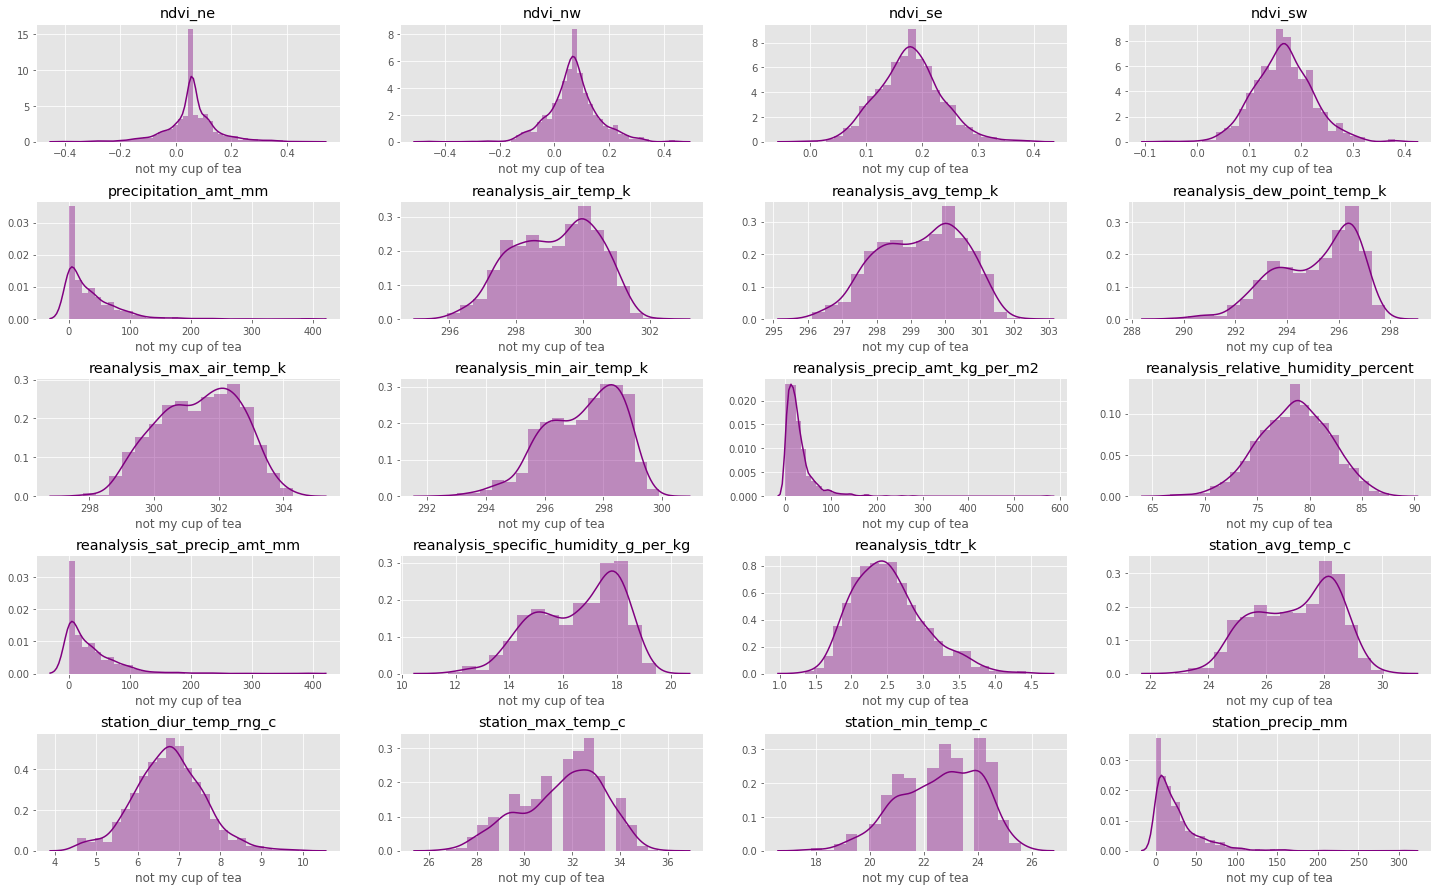

In [7]:
#to check the distribution of each column plotting seaborn's dist plot
fig1= plt.figure(figsize=(25,25)) 
features=['ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm']
for i,j in enumerate(features):
    ax2=fig1.add_subplot(8,4,i+1)
    sns.distplot(train_sj[j],color='purple')
    plt.title('{}'.format(j))
    plt.xlabel('not my cup of tea')
plt.subplots_adjust(hspace = 0.5)
plt.show()


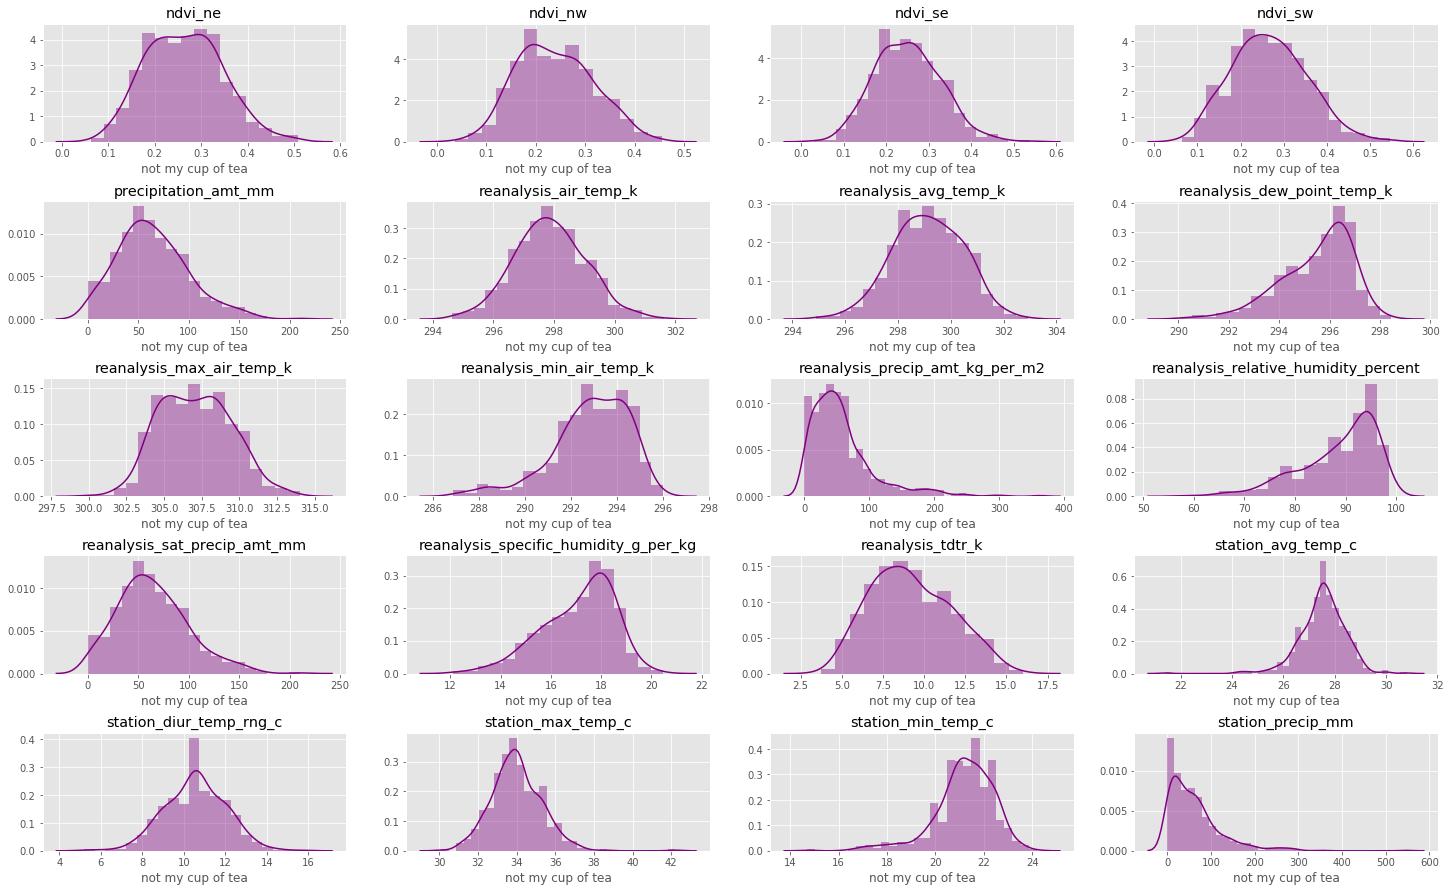

In [8]:
fig1= plt.figure(figsize=(25,25)) 
features=['ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm']
for i,j in enumerate(features):
    ax2=fig1.add_subplot(8,4,i+1)
    sns.distplot(train_iq[j],color='purple')
    plt.title('{}'.format(j))
    plt.xlabel('not my cup of tea')
plt.subplots_adjust(hspace = 0.5)
plt.show()

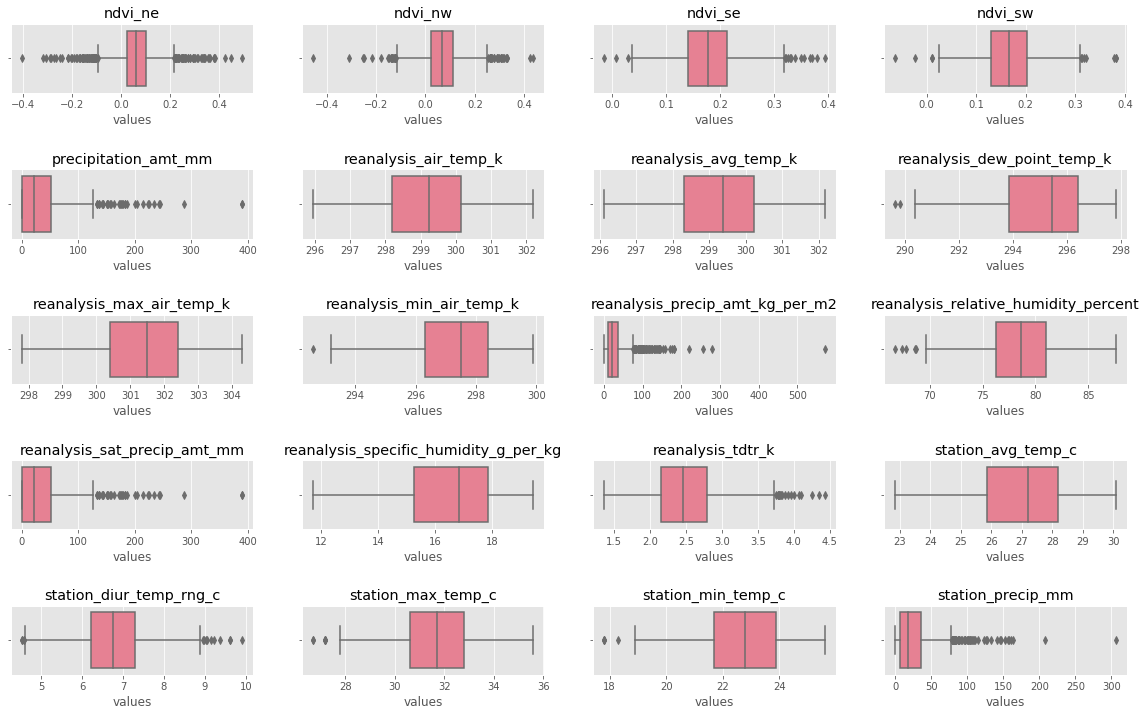

In [9]:
# box plot of all the feature variables

fig=plt.figure(figsize=(20,20))
for i,j  in enumerate(features):
    ax1 = fig.add_subplot(8, 4, i+1)
    sns.boxplot(x=train_sj[j], data=train_sj, palette="husl")
    plt.title('{}'.format(j))
    plt.xlabel('values')
plt.subplots_adjust(hspace = 1.1)
plt.subplots_adjust(wspace = 0.2)
plt.show()

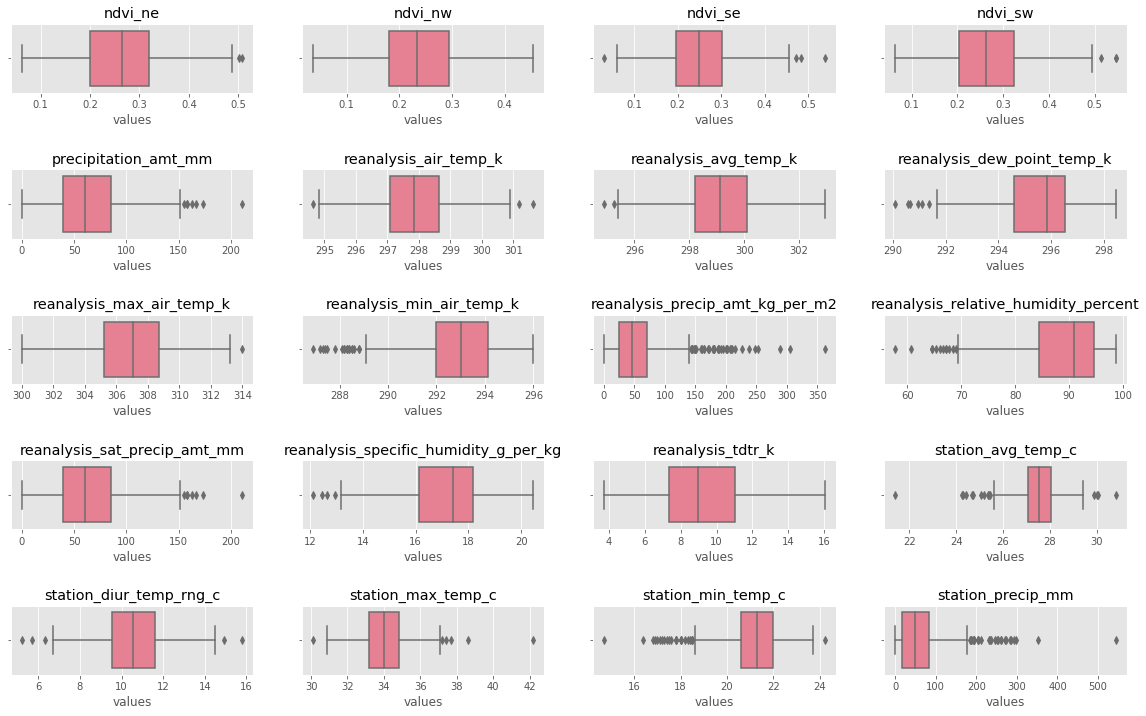

In [10]:
fig=plt.figure(figsize=(20,20))
for i,j  in enumerate(features):
    ax1 = fig.add_subplot(8, 4, i+1)
    sns.boxplot(x=train_iq[j], data=train_iq, palette="husl")
    plt.title('{}'.format(j))
    plt.xlabel('values')
plt.subplots_adjust(hspace = 1.1)
plt.subplots_adjust(wspace = 0.2)
plt.show()

(21.0, 0.0)

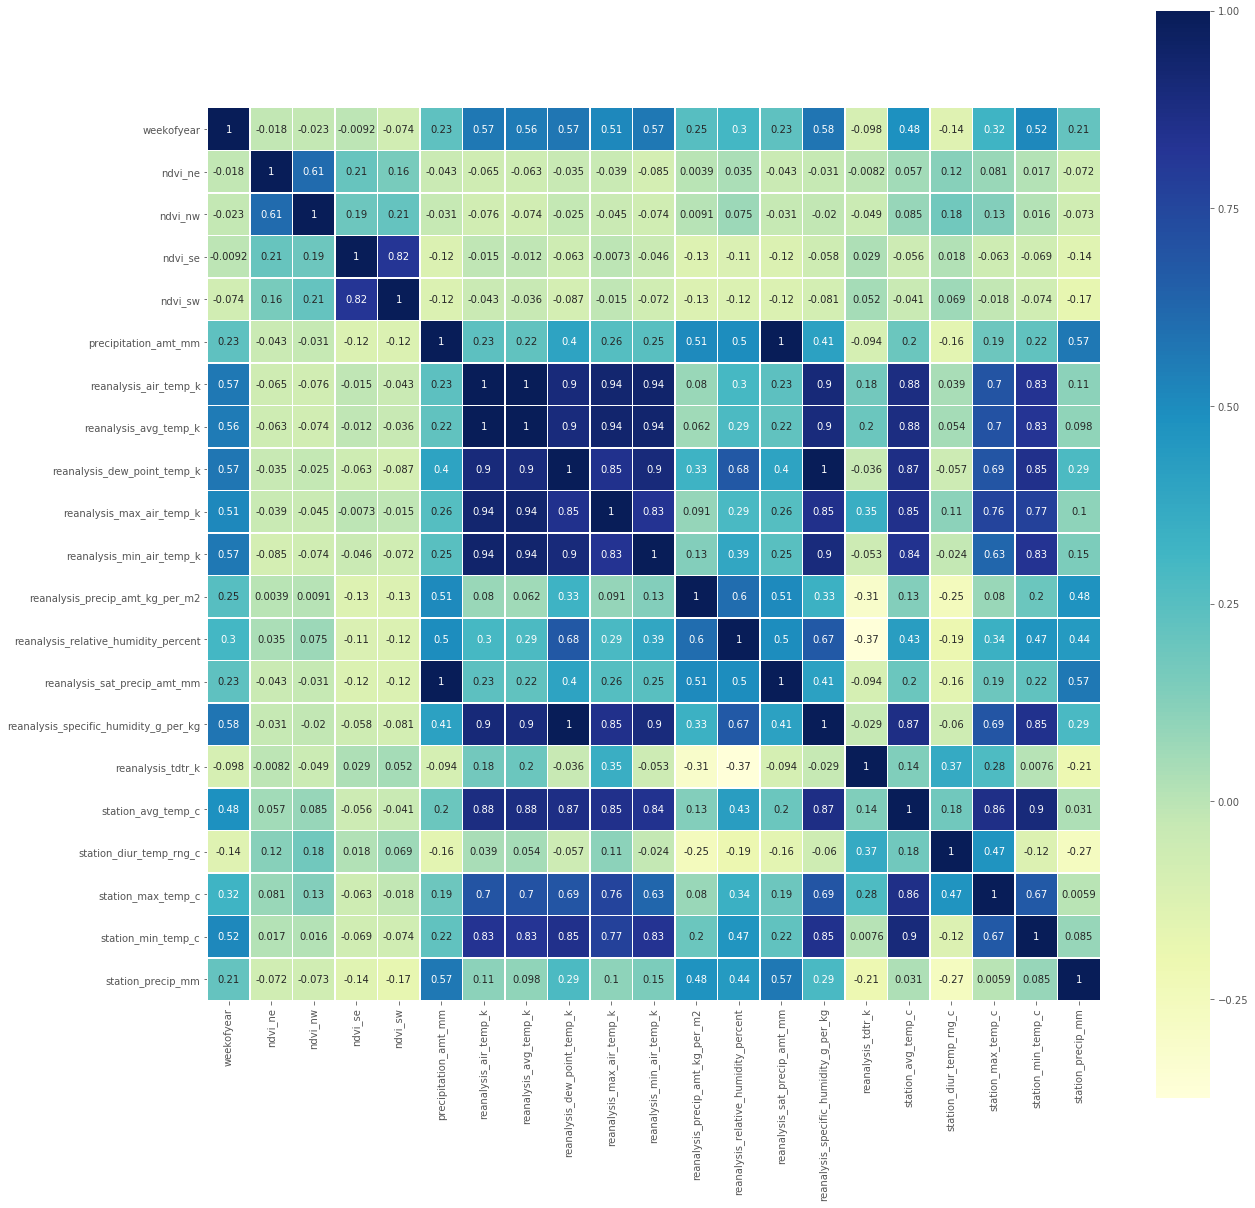

In [11]:
#plotting confusion matrix to see the relation among variables 
corr= train_sj.corr()
ax=plt.figure(figsize=(20,20))
ax = sns.heatmap(corr,square=True, cbar=True, cmap="YlGnBu",\
                 linewidths=0.5,vmax=1.0, linecolor='white', annot=True)
#to fix the error of cut in half bottom and top heatmap
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
#there are so many relations that have strong relation 

(21.0, 0.0)

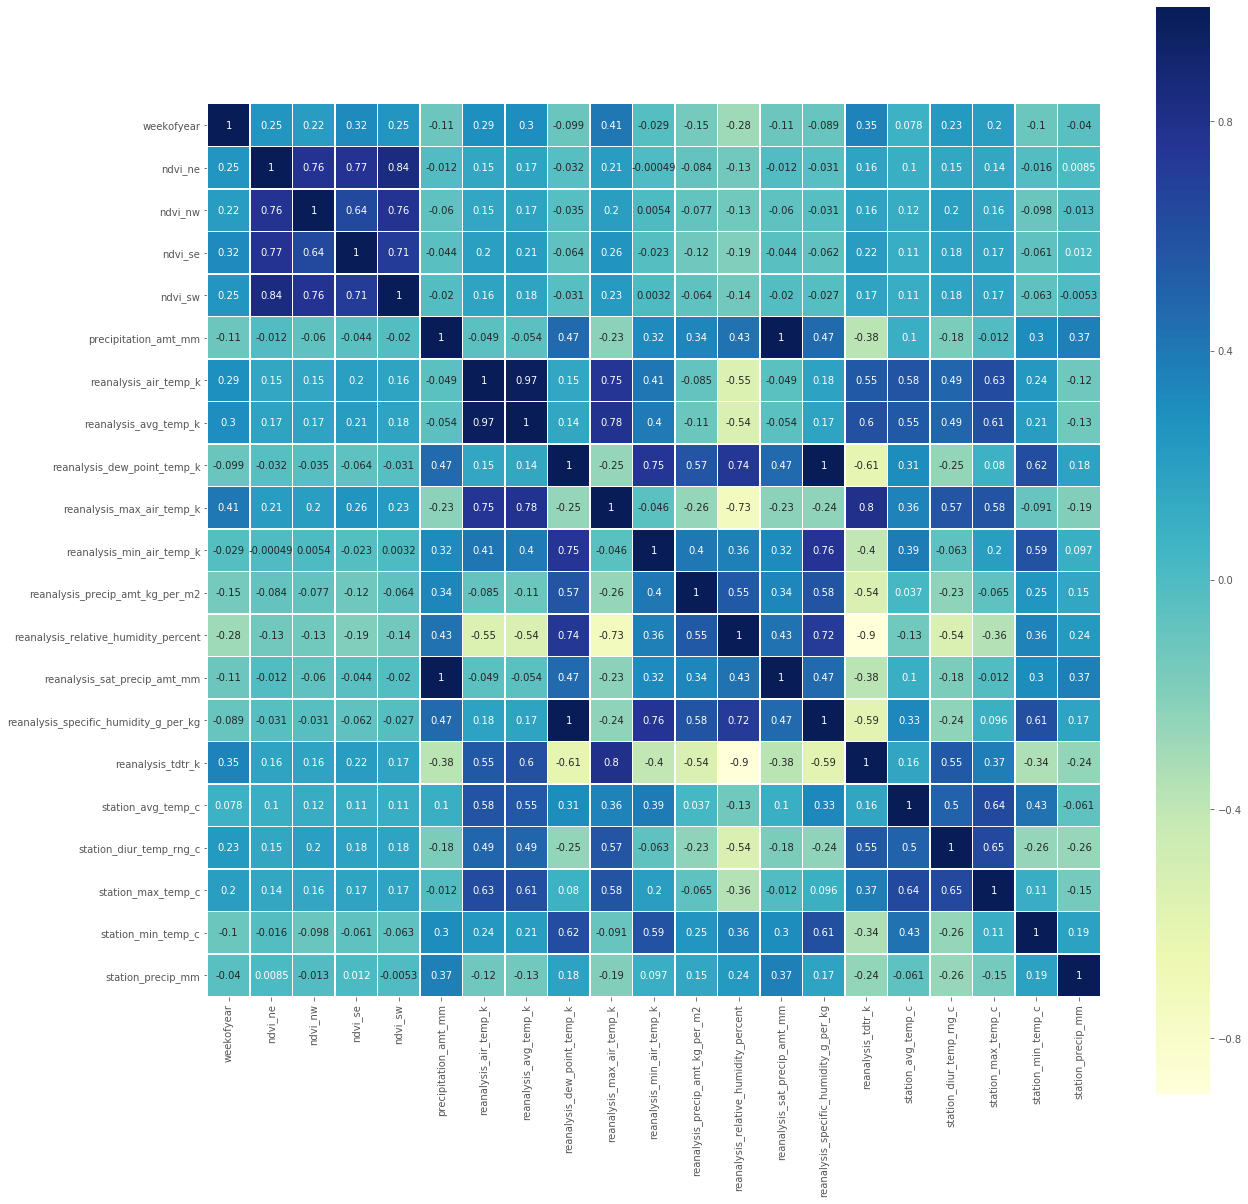

In [12]:
#plotting confusion matrix to see the relation among variables 
corr= train_iq.corr()
ax=plt.figure(figsize=(20,20))
ax = sns.heatmap(corr,square=True, cbar=True, cmap="YlGnBu",\
                 linewidths=0.5,vmax=1.0, linecolor='white', annot=True)
#to fix the error of cut in half bottom and top heatmap
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
#there are so many relations that have strong relation 

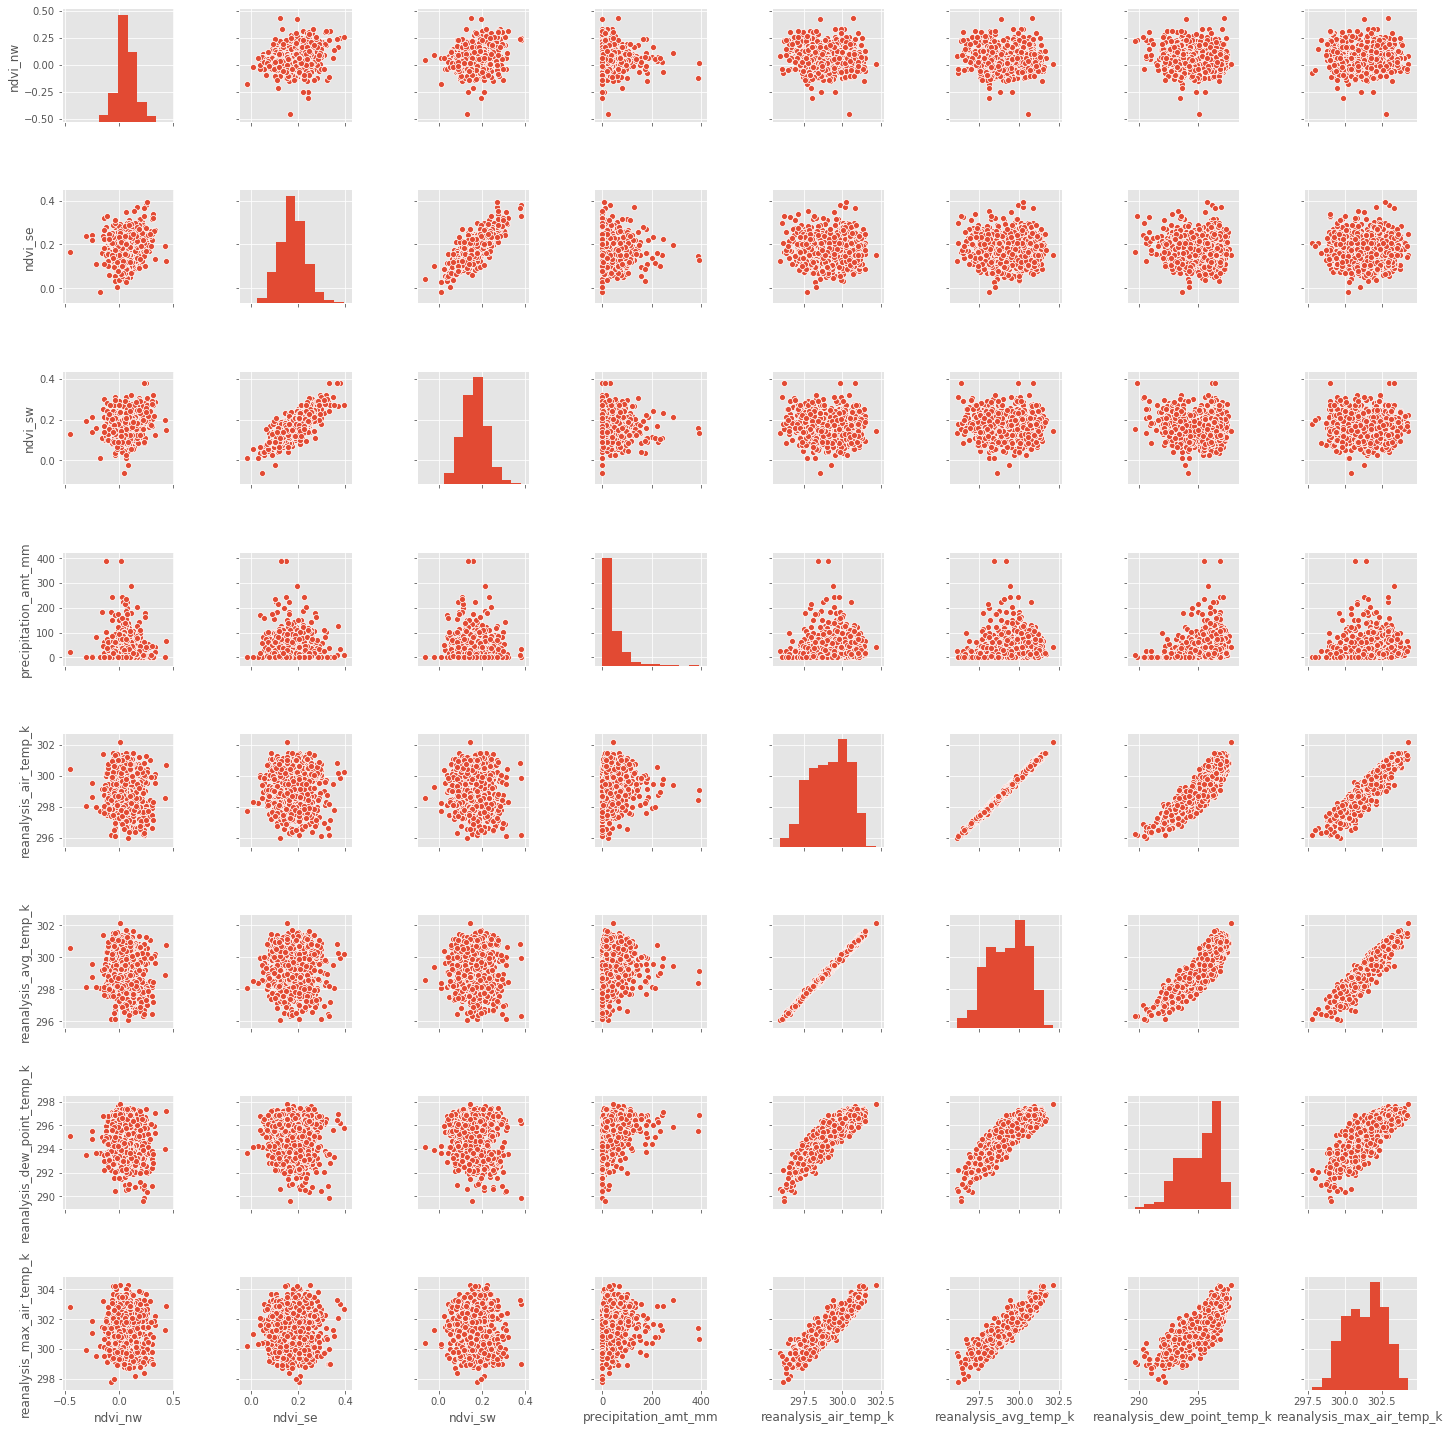

In [13]:
sns.pairplot(train_sj, palette="husl", vars=features[1:9])
plt.show()

In [14]:
#Training the base model to find out the cost function
lr_sj= LinearRegression()
lr_sj.fit(train_sj,label_sj)
prediction_sj=lr_sj.predict(test_sj)

In [15]:
lr_iq= LinearRegression()
lr_iq.fit(train_iq,label_iq)
prediction_iq=lr_iq.predict(test_iq)

In [16]:
test_submission_sj=test_dataset[test_dataset['city']=='sj'][['city', 'year', 'week_start_date']]
test_submission_sj=pd.concat([test_submission_sj,pd.DataFrame(prediction_sj,dtype=np.float)],axis=1,ignore_index=True)
test_submission_iq=test_dataset[test_dataset['city']=='iq'][['city', 'year', 'week_start_date']].reset_index().drop(['index'],axis=1)
test_submission_iq=pd.concat([test_submission_iq,pd.DataFrame(prediction_iq)],axis=1,ignore_index=True)
test_submission_sj.columns=['city','year','weekofyear','total_cases']
test_submission_iq.columns=['city','year','weekofyear','total_cases']

In [17]:
final_submission=test_submission_sj.append(test_submission_iq,ignore_index=True)
final_submission.to_csv('final_submission.csv', header=True, index=False) 